# **Naive Bayes**

Naive Bayes is a simple and probabilistic machine learning algorithm based on Bayes' theorem, which is used for classification tasks. It is particularly popular for text classification, spam filtering, and sentiment analysis due to its simplicity and efficiency. Despite its "naive" assumption, the algorithm often performs surprisingly well in various real-world scenarios.

The "naive" part of Naive Bayes comes from its assumption that all features are conditionally independent, meaning that the presence or absence of one feature does not influence the presence or absence of another feature, given the class label. This is a strong and often unrealistic assumption, especially in cases where features are correlated. However, despite this oversimplification, Naive Bayes can still produce surprisingly good results in many practical applications.

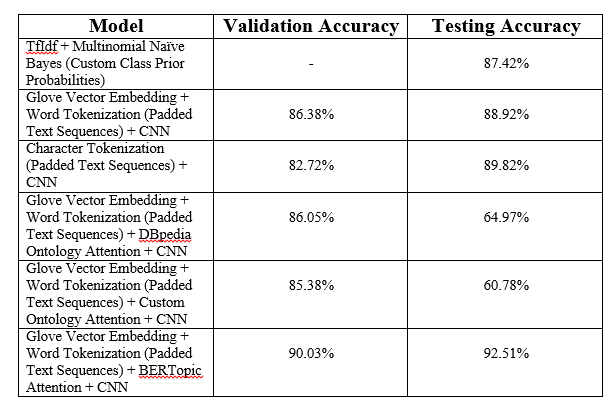

# **Multinomial Naive Bayes**

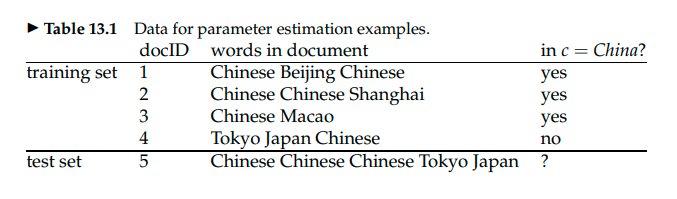

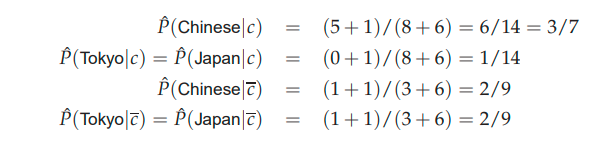

# **1st word probability in Chinese**

5 times chinese in yes category

1 for normalisation

8 total words in yes category

6 unique words in the yes/no category

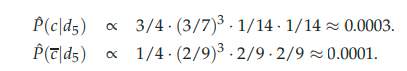

prior probability (yes) * chinese(yes) * chinese(yes) * chinese(yes) * tokyo(yes) * japan(yes)

prior probability (no)* chinese(no) * chinese (no)* chinese(no) * tokyo(no) * japan(no)

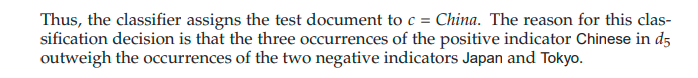

# **Bernoulli Naive Bayes**

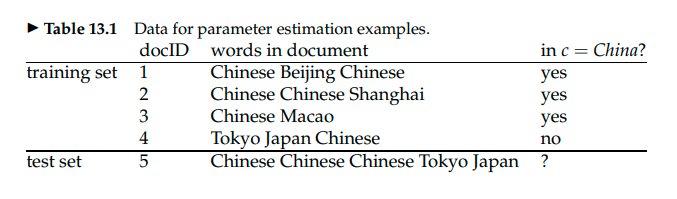

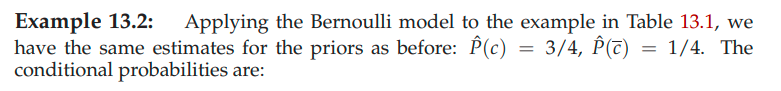

3 yes 1 no

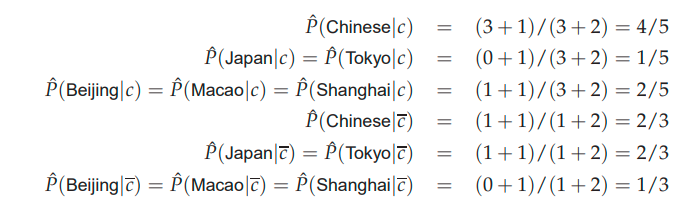

# **1st word probability in Chinese**

3 documents with chinese in yes category

1 for normalisation

3 total documents in yes category

2 for categories (yes/no)

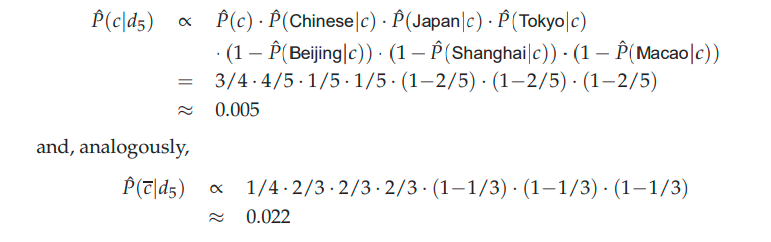

the ones that occur, directly multiply and those that do not occur, 1-probability of occur for those

# **Multinomial vs. Bernoulli**

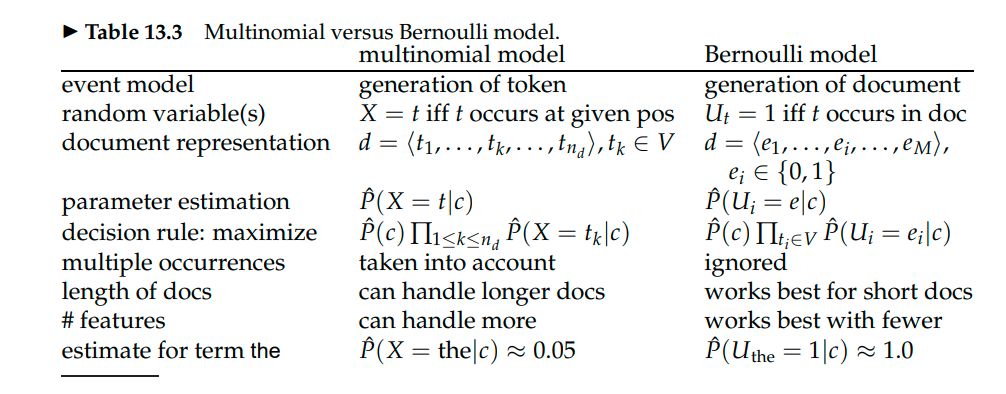

# **Titanic Dataset** https://www.kaggle.com/competitions/titanic/data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
new_df = df.drop(['PassengerId','Name','Ticket','Cabin'],axis =1)
new_df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [ ]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
new_df['Embarked'] = lb.fit_transform(new_df['Embarked'])
lb2 = LabelEncoder()
new_df['Sex'] = lb2.fit_transform(new_df['Sex'])
new_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,NaN,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [ ]:
new_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [ ]:
new_df['Age'] = new_df['Age'].fillna(np.mean(new_df['Age']))

In [ ]:
x = new_df.drop(['Survived'],axis = 1)
y = new_df['Survived']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(712, 7)
(712,)
(179, 7)
(179,)


In [ ]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB

clf1 = MultinomialNB()
clf2 = BernoulliNB()

In [ ]:
clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)

BernoulliNB()

In [ ]:
pred1 = clf1.predict(x_test)
pred2 = clf2.predict(x_test)

In [ ]:
cm1 = confusion_matrix(y_test,pred1)
cr1 = classification_report(y_test,pred1)

cm2 = confusion_matrix(y_test,pred2)
cr2 = classification_report(y_test,pred2)

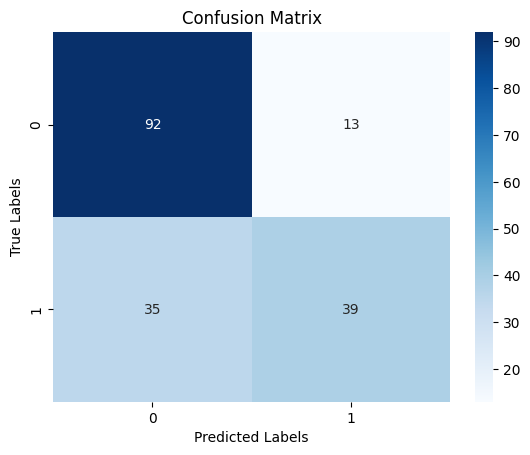

In [ ]:
sns.heatmap(cm1, annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

In [ ]:
sns.heatmap(cm2, annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

In [ ]:
print(cr1)

              precision    recall  f1-score   support

           0       0.72      0.88      0.79       105
           1       0.75      0.53      0.62        74

    accuracy                           0.73       179
   macro avg       0.74      0.70      0.71       179
weighted avg       0.73      0.73      0.72       179



In [ ]:
print(cr2)

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



# **Not Promising Results :(**

In [ ]:
clf3 = MultinomialNB(class_prior = [1,1.2])
clf4 = BernoulliNB(class_prior = [1,1.2])

In [ ]:
clf3.fit(x_train,y_train)
clf4.fit(x_train,y_train)

pred3 = clf3.predict(x_test)
pred4 = clf4.predict(x_test)

cm3 = confusion_matrix(y_test,pred3)
cr3 = classification_report(y_test,pred3)

cm4 = confusion_matrix(y_test,pred4)
cr4 = classification_report(y_test,pred4)

In [ ]:
sns.heatmap(cm3, annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

In [ ]:
sns.heatmap(cm4, annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

In [ ]:
print(cr3)

              precision    recall  f1-score   support

           0       0.72      0.87      0.79       105
           1       0.74      0.53      0.61        74

    accuracy                           0.73       179
   macro avg       0.73      0.70      0.70       179
weighted avg       0.73      0.73      0.72       179



In [ ]:
print(cr4)

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.73      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179



In [ ]:
prior1 = [x/100 for x in range(60,150,5)]
prior2 = [x/100 for x in range(60,150,5)]
best_accuracy = 0.0

best_val1 = None
best_val2 = None

for val2 in prior2:
    for val1 in prior1:
        clf = BernoulliNB(class_prior=[val1, val2])
        clf.fit(x_train, y_train)

        y_pred = clf.predict(x_test)

        acc = accuracy_score(y_test, y_pred)
        if acc > best_accuracy:
            best_accuracy = acc
            best_val1 = val1
            best_val2 = val2

print("Best Accuracy:", best_accuracy)
print("Best val1:", best_val1)
print("Best val2:", best_val2)

Best Accuracy: 0.7877094972067039
Best val1: 0.7
Best val2: 0.6


In [ ]:
prior1 = [x/100 for x in range(100,200,5)]
prior2 = [x/100 for x in range(0,100,5)]
best_accuracy = 0.0

best_val1 = None
best_val2 = None

for val2 in prior2:
    for val1 in prior1:
        clf = BernoulliNB(class_prior=[0.7, 0.6],alpha = val1,binarize = val2)
        clf.fit(x_train, y_train)

        y_pred = clf.predict(x_test)

        acc = accuracy_score(y_test, y_pred)
        if acc > best_accuracy:
            best_accuracy = acc
            best_val1 = val1
            best_val2 = val2

print("Best Accuracy:", best_accuracy)
print("Best val1:", best_val1)
print("Best val2:", best_val2)

Best Accuracy: 0.7932960893854749
Best val1: 1.0
Best val2: 0.85


# **Finally The Most Optimized Classifier**

In [ ]:
clf = BernoulliNB(class_prior=[0.7, 0.6],alpha = 1,binarize = 0.85)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)

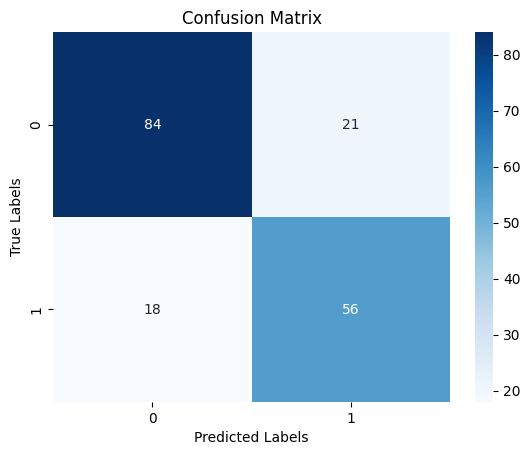

In [ ]:
sns.heatmap(cm4, annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

In [ ]:
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       105
           1       0.75      0.74      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179

